The work has been done in Google Colab, as it provides free GPU

In [1]:
#I have commented the lines below while pushing the code in github because it had an authorization url specific to my Google email id
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import zipfile
from zipfile import ZipFile
import os, shutil
import numpy as np
import pandas as pd
import math
from math import ceil
from IPython.display import display
from PIL import Image

The dataset has been obtained from the following URL: https://www.kaggle.com/coreylammie/deepweedsx
For more information pertaining to the dataset please visit the above mentioned URL

From the above URL, we get the following information about the weeds species and they have been labelled in this manner:
0- Chinee Apple 1- Lantana 2- Parkinsonia 3- Parthenium 4- Prickly Acacia 5- Rubber Vine 6- Siam Weed 7- Snake Weed 8- Other

In [3]:
weeds_list = ['Chinee Apple', 'Lantana', 'Parkinsonia', 'Parthenium', 'Prickly Acacia', 'Rubber Vine', 'Siam Weed', 'Snake Weed', 'Other']
weeds_type_dict = {}
for i in range(len(weeds_list)):
    weeds_type_dict['weed_type_' + str(i)] = weeds_list[i]
print(weeds_type_dict)

{'weed_type_0': 'Chinee Apple', 'weed_type_1': 'Lantana', 'weed_type_2': 'Parkinsonia', 'weed_type_3': 'Parthenium', 'weed_type_4': 'Prickly Acacia', 'weed_type_5': 'Rubber Vine', 'weed_type_6': 'Siam Weed', 'weed_type_7': 'Snake Weed', 'weed_type_8': 'Other'}


In [0]:
def unzip_weed_files(zipFilePath, unzip_directory):
    weeds_zip = ZipFile(zipFilePath, 'r')
    weeds_zip.extractall(unzip_directory)
    weeds_zip.close()
    

In [0]:
def delete_file_directory(path, isDirectory):
    if isDirectory:
        shutil.rmtree(path)
    else:
        os.remove(path)

In [0]:
unzip_weed_files('drive/My Drive/datasets/agriculture/deepweedsx.zip', 'unzipped_weeds_data')

In [0]:
unzip_weed_files('unzipped_weeds_data/DeepWeeds_Images_256.zip', 'unzipped_weeds_data/unzipped_weeds_imgs')

In [8]:
len(os.listdir('unzipped_weeds_data/unzipped_weeds_imgs'))

17536

In [0]:
#Since, we have unzipped the images, we can delete the zip file of images, to release memory
delete_file_directory('unzipped_weeds_data/DeepWeeds_Images_256.zip', False)

In [0]:
test_df = pd.read_csv('unzipped_weeds_data/test_set_labels.csv')

In [11]:
test_df.head()

Label  Species
0  20160928-141107-0.jpg        0
1  20160928-141135-0.jpg        0
2  20161207-110730-0.jpg        0
3  20161207-110850-0.jpg        0
4  20161207-112015-0.jpg        0

In [0]:
test_img_label_dict = dict(zip(test_df['Label'], test_df['Species']))

In [13]:
test_df.dtypes

Label      object
Species     int64
dtype: object

In [14]:
test_df['Species'].value_counts()

8    1301
0     161
6     153
1     152
4     152
2     147
3     146
7     145
5     144
Name: Species, dtype: int64

In [0]:
main_df = pd.read_csv('unzipped_weeds_data/train_set_labels.csv')

In [16]:
main_df.head()

Label  Species
0  20161207-111327-0.jpg        0
1  20170718-095159-2.jpg        0
2  20170811-133439-1.jpg        0
3  20170811-133752-1.jpg        0
4  20170217-114015-0.jpg        0

In [17]:
main_df.dtypes

Label      object
Species     int64
dtype: object

In [18]:
main_df['Species'].value_counts()

8    7804
0     964
6     921
1     912
4     910
2     884
3     876
7     871
5     865
Name: Species, dtype: int64

We can see from above that the number of images of class 8 is very large when compared to the other classes of weeds. This will lead to class imbalance. So, we will take only a subset of images from class 8 whose size is comparable to those of other classes.

In [0]:
main_img_label_dict = dict(zip(main_df['Label'], main_df['Species']))

In [0]:
base_dir = 'unzipped_weeds_data'
test_dir = os.path.join(base_dir, 'test_data')
os.mkdir(test_dir)

In [0]:
main_dir = os.path.join(base_dir, 'main_data')
os.mkdir(main_dir)

In [0]:
def create_weed_type_dir(parent_dir):
    for i in range(9):
        weed_type_dir = os.path.join(parent_dir, 'weed_type_' + str(i))
        os.mkdir(weed_type_dir)
        

In [0]:
create_weed_type_dir(test_dir)

In [0]:
create_weed_type_dir(main_dir)

In [0]:
img_files = os.listdir('unzipped_weeds_data/unzipped_weeds_imgs')

In [0]:
def copy_paste_weed_imgs(img_label_dict, copy_dir, paste_dir, max_num_of_files):
    for img in img_files:
        if img in img_label_dict:
            weed_type_dir = os.path.join(paste_dir, 'weed_type_' + str(img_label_dict[img]))
            if len(os.listdir(weed_type_dir)) <= max_num_of_files:
                src = os.path.join(copy_dir, img)
                dst = os.path.join(weed_type_dir, img)
                shutil.copyfile(src, dst)   

In [0]:
copy_paste_weed_imgs(test_img_label_dict, 'unzipped_weeds_data/unzipped_weeds_imgs', 'unzipped_weeds_data/test_data', 161)

In [0]:
copy_paste_weed_imgs(main_img_label_dict, 'unzipped_weeds_data/unzipped_weeds_imgs', 'unzipped_weeds_data/main_data', 964)

In [0]:
#The images have been transferred to main_data and test_data folders, so, we don't need the unzipped_weeds_imgs folder. Let us delete it release memory.
delete_file_directory('unzipped_weeds_data/unzipped_weeds_imgs', True)

In [30]:
#Let us check the number of images in each weed type (main_data and test_data)
for i in range(9):
    cur_weed_type = 'weed_type_' + str(i)
    print(cur_weed_type)
    print('number of images in main', len(os.listdir('unzipped_weeds_data/main_data/' + cur_weed_type)))
    print('number of images in test', len(os.listdir('unzipped_weeds_data/test_data/' + cur_weed_type)))

weed_type_0
number of images in main 964
number of images in test 161
weed_type_1
number of images in main 912
number of images in test 152
weed_type_2
number of images in main 884
number of images in test 147
weed_type_3
number of images in main 876
number of images in test 146
weed_type_4
number of images in main 910
number of images in test 152
weed_type_5
number of images in main 865
number of images in test 144
weed_type_6
number of images in main 921
number of images in test 153
weed_type_7
number of images in main 871
number of images in test 145
weed_type_8
number of images in main 965
number of images in test 162


Now we will split the 'main_data' into 'train_data' and 'val_data'. 20% of the data in main data will be used for validation.

In [0]:
train_dir = os.path.join(base_dir, 'train_data')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val_data')
os.mkdir(val_dir)

In [0]:
create_weed_type_dir(train_dir)
create_weed_type_dir(val_dir)

In [0]:
total_train_imgs = 0
total_val_imgs = 0
for i in range(len(weeds_list)):
    cur_weed_type = 'weed_type_' + str(i)
    copy_dir = 'unzipped_weeds_data/main_data/' + cur_weed_type
    paste_dir_train = 'unzipped_weeds_data/train_data/' + cur_weed_type
    paste_dir_val = 'unzipped_weeds_data/val_data/' + cur_weed_type
    cur_imgs = os.listdir(copy_dir)
    cur_num_of_imgs = len(cur_imgs)
    cur_num_of_train_imgs = ceil(0.8*cur_num_of_imgs)
    total_train_imgs += cur_num_of_train_imgs
    cur_num_of_val_imgs = cur_num_of_imgs - cur_num_of_train_imgs
    total_val_imgs += cur_num_of_val_imgs
    for j in range(cur_num_of_imgs):
        src = os.path.join(copy_dir, cur_imgs[j])
        if j < cur_num_of_train_imgs:
            dst = os.path.join(paste_dir_train, cur_imgs[j])
        else:
            dst = os.path.join(paste_dir_val, cur_imgs[j])
        shutil.copyfile(src, dst)
            
    
    

In [34]:
print('total train images', total_train_imgs)
print('total validation images', total_val_imgs)

total train images 6537
total validation images 1631


In [0]:
delete_file_directory('unzipped_weeds_data/main_data', True)

Let us see the images of weeds belonging to each class. we are going to show 4 images per class here. Let us see the images from the train_data folder

weed_type_0: Chinee Apple


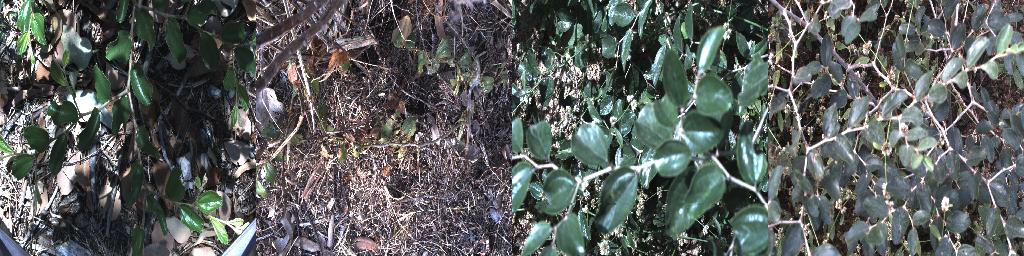

weed_type_1: Lantana


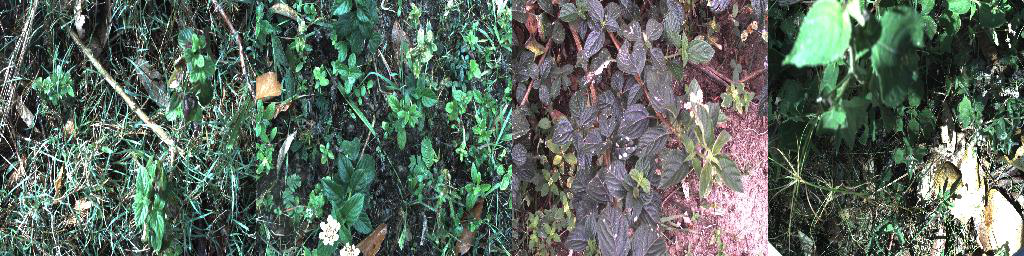

weed_type_2: Parkinsonia


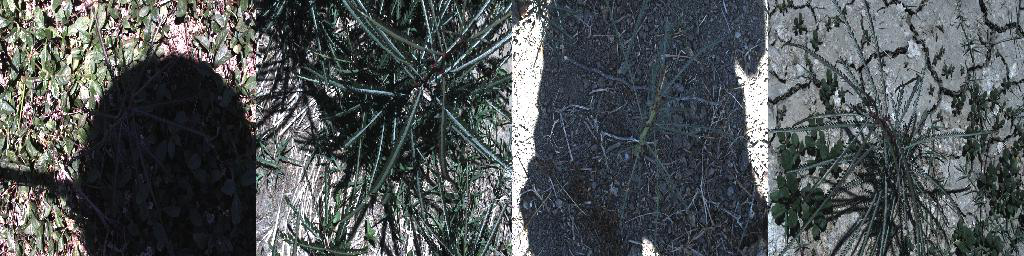

weed_type_3: Parthenium


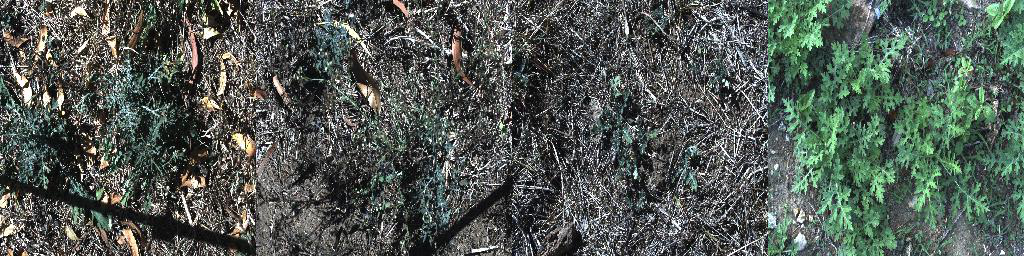

weed_type_4: Prickly Acacia


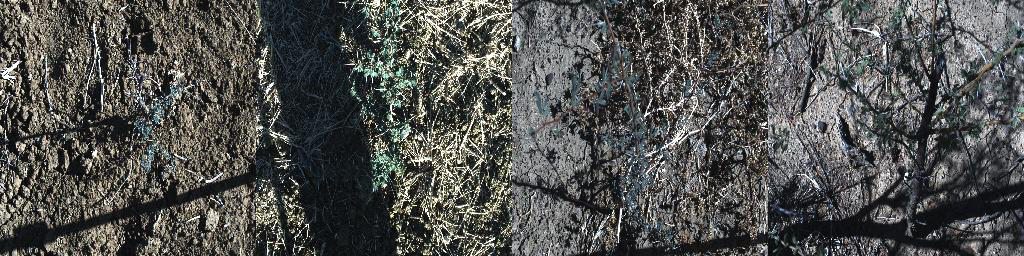

weed_type_5: Rubber Vine


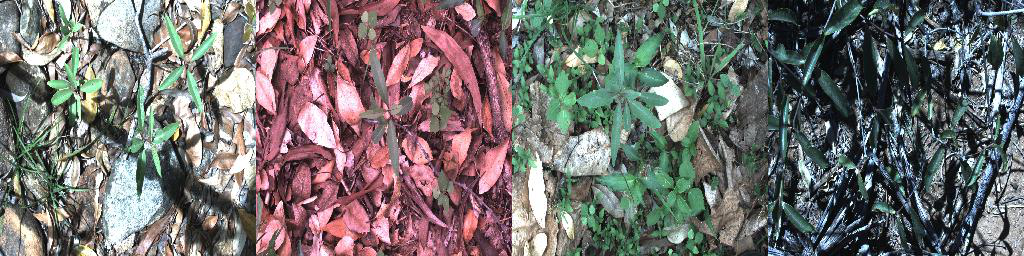

weed_type_6: Siam Weed


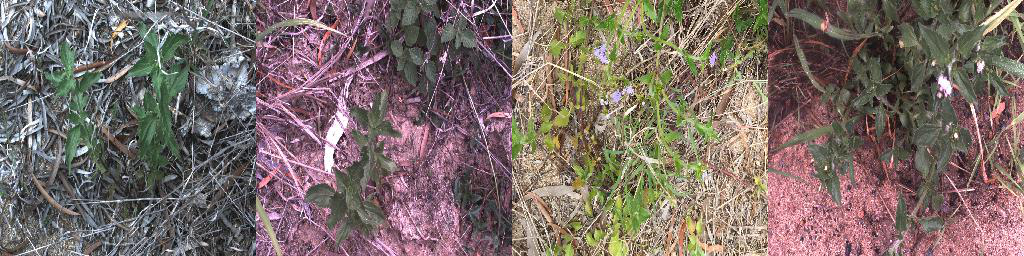

weed_type_7: Snake Weed


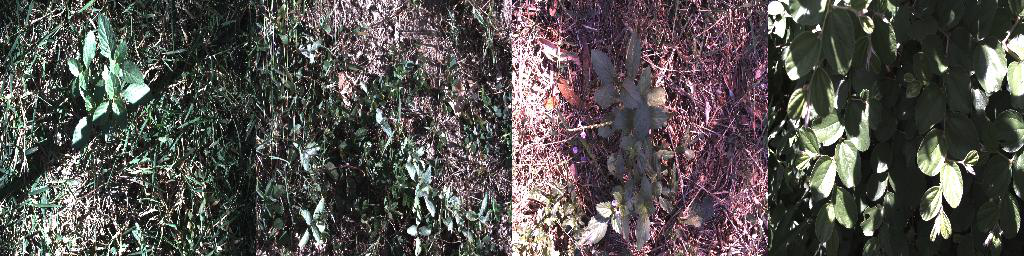

weed_type_8: Other


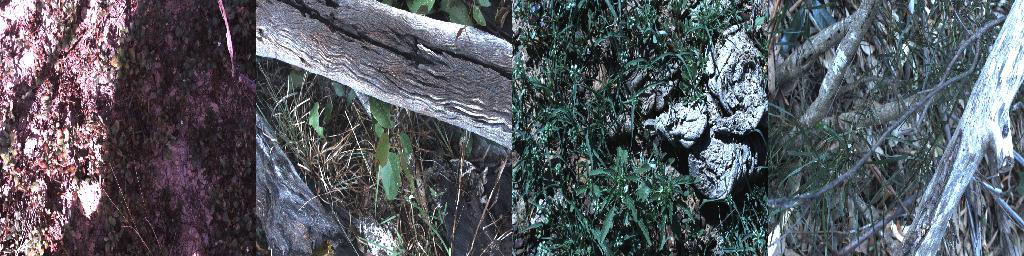

In [36]:
for i in range(len(weeds_list)):
    cur_weed_type = 'weed_type_' + str(i)
    print(cur_weed_type + ': ' + weeds_type_dict[cur_weed_type])
    cur_weed_type_dir = 'unzipped_weeds_data/train_data/' + cur_weed_type
    cur_weed_type_imgs = os.listdir(cur_weed_type_dir)[:4]
    canvas_sheet_width = 1024
    canvas_sheet_height = 256
    canvas_sheet = Image.new('RGB', (canvas_sheet_width, canvas_sheet_height))
    x = 0
    for cur_img in cur_weed_type_imgs:
        img = Image.open(cur_weed_type_dir + '/' + cur_img)
        canvas_sheet.paste(img, (x, 0))
        x += 256
    display(canvas_sheet)
        

In [0]:
from keras import layers, models

In [0]:
def naive_conv_base(input_shape):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  return model

In [0]:
naive_model1 = naive_conv_base((256,256,3))
naive_model1.add(layers.Flatten())
naive_model1.add(layers.Dense(512, activation='relu'))
naive_model1.add(layers.Dense(9, activation='softmax'))

In [47]:
naive_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        36928     
__________

In [48]:
from keras import optimizers
naive_model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

W0709 19:42:04.862565 140165178681216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 19:42:04.871393 140165178681216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [51]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256,256), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(val_dir, target_size=(256,256), batch_size=32, class_mode='categorical')

Found 6537 images belonging to 9 classes.
Found 1631 images belonging to 9 classes.


In [52]:
batch_size = 32
steps_per_epoch = ceil(total_train_imgs/batch_size)
validation_steps = ceil(total_val_imgs/batch_size)
print('steps_per_epoch', steps_per_epoch)
print('validation_steps', validation_steps)

steps_per_epoch 205
validation_steps 51


In [0]:
def naive_model_fit(model, num_epochs):
  
  history_data = model.fit_generator(
      train_generator, 
      steps_per_epoch=steps_per_epoch, 
      epochs=num_epochs, 
      validation_data=validation_generator, 
      validation_steps=validation_steps)
  return history_data

In [55]:
model_history_data = naive_model_fit(naive_model1, 35)

W0709 19:48:05.552147 140165178681216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 19:48:05.651429 140165178681216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/35
205/205 [==============================] - 27s 132ms/step - loss: 1.9856 - acc: 0.2177 - val_loss: 1.6717 - val_acc: 0.3329
Epoch 2/35
205/205 [==============================] - 19s 94ms/step - loss: 1.6801 - acc: 0.3518 - val_loss: 1.6364 - val_acc: 0.3820
Epoch 3/35
205/205 [==============================] - 19s 93ms/step - loss: 1.6105 - acc: 0.3744 - val_loss: 1.5804 - val_acc: 0.3660
Epoch 4/35
205/205 [==============================] - 19s 93ms/step - loss: 1.5618 - acc: 0.3993 - val_loss: 1.5348 - val_acc: 0.4077
Epoch 5/35
205/205 [==============================] - 19s 93ms/step - loss: 1.5269 - acc: 0.4141 - val_loss: 1.5612 - val_acc: 0.3942
Epoch 6/35
205/205 [==============================] - 19s 93ms/step - loss: 1.5004 - acc: 0.4269 - val_loss: 1.5356 - val_acc: 0.4016
Epoch 7/35
205/205 [==============================] - 19s 93ms/step - loss: 1.4532 - acc: 0.4439 - val_loss: 1.5716 - val_acc: 0.3893
Epoch 8/35
205/205 [==============================] - 19s 93m

In [0]:
import seaborn as sns

In [0]:
def create_line_charts(df, title):
  sns.lineplot(data=df).set_title(title)
  
def create_acc_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  acc_val = history_data.history['acc']
  validation_acc_val = history_data.history['val_acc']
  acc_dict = {
      'epochs':epochs_val,
      'acc':acc_val,
      'val_acc':validation_acc_val
  }
  acc_df = pd.DataFrame(acc_dict)
  acc_df.set_index('epochs', inplace=True)
  return acc_df

def create_loss_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  loss_val = history_data.history['loss']
  validation_loss_val = history_data.history['val_loss']
  loss_dict = {
      'epochs':epochs_val,
      'loss':loss_val,
      'val_loss':validation_loss_val
  }
  loss_df = pd.DataFrame(loss_dict)
  loss_df.set_index('epochs', inplace=True)
  return loss_df


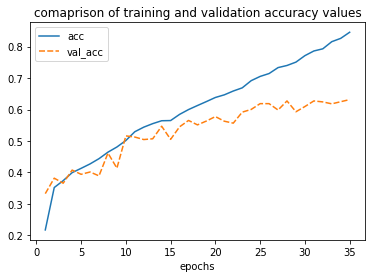

In [74]:
create_line_charts(create_acc_df(model_history_data, 35), 'comaprison of training and validation accuracy values')

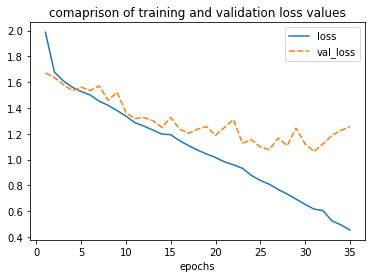

In [75]:
create_line_charts(create_loss_df(model_history_data, 35), 'comaprison of training and validation loss values')

In [76]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256,256), batch_size=32, class_mode='categorical')

Found 1362 images belonging to 9 classes.


In [77]:
test_steps = ceil(1362/32)
print('test_steps', test_steps)

test_steps 43


In [0]:
test_loss, test_accuracy = naive_model1.evaluate_generator(test_generator, steps=test_steps)

In [80]:
print('test_loss', test_loss)
print('test_accuracy', test_accuracy)

test_loss 1.2070084897782134
test_accuracy 0.6343612337427518


Even though, the training accuracy is high, we can observe that that the validation accuracy and testing accuracy is quite low. We need to try different methodologies to improve the results. Let's start with data augmentation and adding dropout

In [0]:
naive_model2 = naive_conv_base((256,256,3))
naive_model2.add(layers.Flatten())
naive_model2.add(layers.Dropout(rate=0.4))
naive_model2.add(layers.Dense(512, activation='relu'))
naive_model2.add(layers.Dense(9, activation='softmax'))

naive_model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=25,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True
    )
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [83]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256,256), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(val_dir, target_size=(256,256), batch_size=32, class_mode='categorical')

Found 6537 images belonging to 9 classes.
Found 1631 images belonging to 9 classes.


In [84]:
model_history_data2 = naive_model_fit(naive_model2, 100)

Epoch 1/100
205/205 [==============================] - 20s 100ms/step - loss: 2.0268 - acc: 0.1960 - val_loss: 1.8720 - val_acc: 0.2213
Epoch 2/100
205/205 [==============================] - 19s 95ms/step - loss: 1.7920 - acc: 0.2837 - val_loss: 1.9846 - val_acc: 0.2698
Epoch 3/100
205/205 [==============================] - 19s 94ms/step - loss: 1.6602 - acc: 0.3500 - val_loss: 1.7671 - val_acc: 0.2888
Epoch 4/100
205/205 [==============================] - 19s 94ms/step - loss: 1.6091 - acc: 0.3727 - val_loss: 1.5537 - val_acc: 0.3789
Epoch 5/100
205/205 [==============================] - 19s 94ms/step - loss: 1.5597 - acc: 0.3866 - val_loss: 1.6482 - val_acc: 0.3525
Epoch 6/100
205/205 [==============================] - 19s 93ms/step - loss: 1.5002 - acc: 0.4241 - val_loss: 1.4451 - val_acc: 0.4555
Epoch 7/100
205/205 [==============================] - 19s 94ms/step - loss: 1.4602 - acc: 0.4413 - val_loss: 1.5064 - val_acc: 0.4157
Epoch 8/100
205/205 [==============================] -

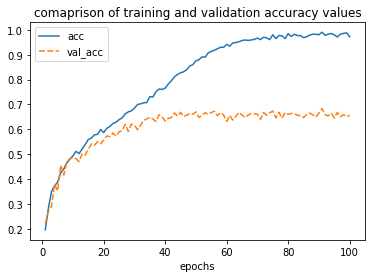

In [85]:
create_line_charts(create_acc_df(model_history_data2, 100), 'comaprison of training and validation accuracy values')

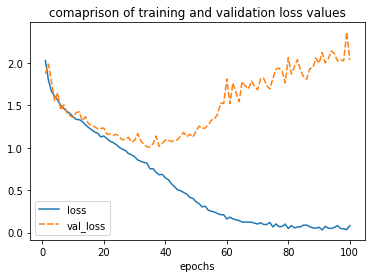

In [86]:
create_line_charts(create_loss_df(model_history_data2, 100), 'comaprison of training and validation loss values')

In [0]:
test_loss, test_accuracy = naive_model2.evaluate_generator(test_generator, steps=test_steps)

In [88]:
print('test_loss', test_loss)
print('test_accuracy', test_accuracy)

test_loss 2.0123142937031435
test_accuracy 0.6571218795013147


To improve the results, let us implement transfer learning

In [0]:
from keras.applications import VGG16

In [91]:
conv_base1 = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

58892288/58889256 [==============================] - 4s 0us/step


In [92]:
conv_base1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
custom_model1 = models.Sequential()
custom_model1.add(conv_base1)
custom_model1.add(layers.Flatten())
custom_model1.add(layers.Dense(512, activation='relu'))
custom_model1.add(layers.Dense(9, activation='softmax'))

In [94]:
custom_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 4617      
Total params: 31,497,033
Trainable params: 31,497,033
Non-trainable params: 0
_________________________________________________________________


In [95]:
print('number of trainable weights before freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights before freezing the conv base 30


In [0]:
conv_base1.trainable = False

In [97]:
print('number of trainable weights after freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights after freezing the conv base 4


In [0]:
custom_model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

In [99]:
model_history_data3 = naive_model_fit(custom_model1, 30)

Epoch 1/30
205/205 [==============================] - 57s 277ms/step - loss: 1.2944 - acc: 0.5314 - val_loss: 0.9981 - val_acc: 0.6487
Epoch 2/30
205/205 [==============================] - 51s 251ms/step - loss: 0.7741 - acc: 0.7353 - val_loss: 1.0392 - val_acc: 0.6205
Epoch 3/30
205/205 [==============================] - 53s 258ms/step - loss: 0.5481 - acc: 0.8238 - val_loss: 0.8366 - val_acc: 0.7082
Epoch 4/30
205/205 [==============================] - 54s 265ms/step - loss: 0.4225 - acc: 0.8756 - val_loss: 0.8562 - val_acc: 0.7002
Epoch 5/30
205/205 [==============================] - 55s 267ms/step - loss: 0.3047 - acc: 0.9237 - val_loss: 0.8483 - val_acc: 0.6990
Epoch 6/30
205/205 [==============================] - 55s 267ms/step - loss: 0.2441 - acc: 0.9401 - val_loss: 0.8581 - val_acc: 0.7094
Epoch 7/30
205/205 [==============================] - 55s 267ms/step - loss: 0.1792 - acc: 0.9684 - val_loss: 0.7914 - val_acc: 0.7394
Epoch 8/30
205/205 [==============================] - 5

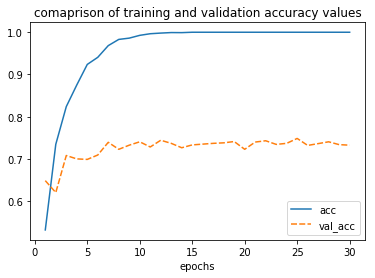

In [101]:
create_line_charts(create_acc_df(model_history_data3, 30), 'comaprison of training and validation accuracy values')

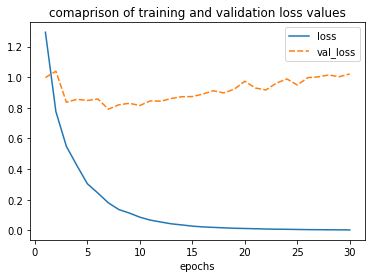

In [102]:
create_line_charts(create_loss_df(model_history_data3, 30), 'comaprison of training and validation loss values')

In [103]:
test_loss, test_accuracy = custom_model1.evaluate_generator(test_generator, steps=test_steps)
print('test_loss', test_loss)
print('test_accuracy', test_accuracy)


test_loss 1.1211053425344952
test_accuracy 0.7195301027900147
